In [60]:
# Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [61]:
#import datasets
data = sklearn.datasets.load_breast_cancer()

In [62]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [63]:
#Convert raw data to dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

In [64]:
# top 5 recods
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
# Add the target column to dataset
df['label'] = data.target

In [66]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [67]:
# Check null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [68]:
# see the correlations of the data
correlation = df.corr()

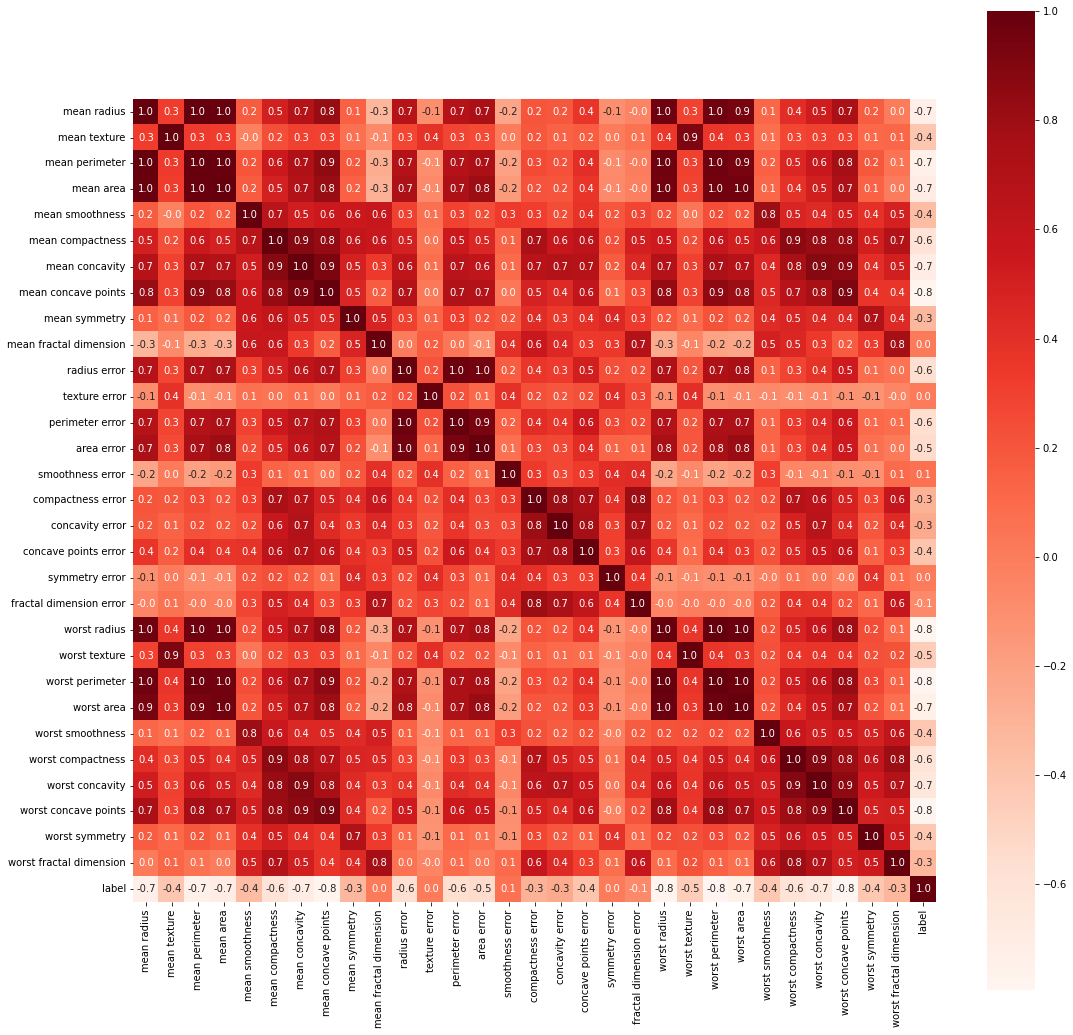

In [69]:
plt.figure(figsize=(18,18))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10} ,cmap='Reds')

In [70]:
#statistical measures
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [73]:
# separate the X and Y data
X = df.drop(columns=['label'], axis=1)
Y = df['label']

In [74]:
# convert x and y values to array
#X = np.asarray(X)
#Y = np.asarray(Y)

GridSearchCV

In [75]:
# load model
model = SVC()

In [79]:
# hyperparameter values
parameters = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
    'C':[1, 5, 10, 20]}

In [80]:
# GridSearchCV
svc = GridSearchCV(model, parameters, cv=5)

In [81]:
#fit model
svc.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [90]:
#check results
svc.cv_results_

{'mean_fit_time': array([1.37723465e+00, 5.21697998e-03, 7.06210136e-03, 1.81023121e-02,
        2.80544090e+00, 5.35025597e-03, 6.52809143e-03, 1.69806480e-02,
        4.15803604e+00, 5.68604469e-03, 6.39295578e-03, 1.60645008e-02,
        7.82140636e+00, 2.82286644e-02, 2.55171776e-02, 3.99362564e-02]),
 'std_fit_time': array([5.43795952e-01, 9.93801854e-05, 1.57814126e-04, 9.05991976e-04,
        5.64240977e-01, 3.08309116e-04, 1.69735369e-04, 1.79892731e-03,
        7.81415799e-01, 1.98977353e-04, 1.60346731e-04, 6.95899302e-04,
        2.74728971e+00, 9.24957149e-03, 2.23747009e-03, 1.50362590e-02]),
 'mean_score_time': array([0.00241532, 0.00227823, 0.00336585, 0.00607586, 0.00291901,
        0.00237694, 0.00306387, 0.00570221, 0.00238552, 0.00235519,
        0.00293474, 0.00489655, 0.00291367, 0.01111951, 0.01003137,
        0.00907183]),
 'std_score_time': array([1.52658997e-04, 2.96612644e-05, 1.52154217e-04, 8.36455451e-04,
        1.03227085e-03, 1.20457561e-04, 8.76103644e-

In [83]:
# loading result as a dataframe
result = pd.DataFrame(svc.cv_results_)

In [86]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.377235,0.543796,0.002415,0.000153,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.005217,0.000099,0.002278,0.000030,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.007062,0.000158,0.003366,0.000152,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.018102,0.000906,0.006076,0.000836,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,2.805441,0.564241,0.002919,0.001032,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [92]:
# to check which c_params value is best value
parameter_value = svc.best_params_
print(parameter_value)

{'C': 10, 'kernel': 'linear'}


In [94]:
# to check the best accuracy for best value
high_accuracy = svc.best_score_
print(high_accuracy)

0.9525694767893185


In [96]:
# take important data for understand
best_val_accuracy = result[['param_C','param_kernel',	'params', 'mean_test_score']]

In [98]:
best_val_accuracy

,param_C,param_kernel,params,mean_test_score
0,1,linear,"{'C': 1, 'kernel': 'linear'}",0.945536
1,1,poly,"{'C': 1, 'kernel': 'poly'}",0.908663
2,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.912172
3,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.460441
4,5,linear,"{'C': 5, 'kernel': 'linear'}",0.950815
5,5,poly,"{'C': 5, 'kernel': 'poly'}",0.922729
6,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.931501
7,5,sigmoid,"{'C': 5, 'kernel': 'sigmoid'}",0.411178
8,10,linear,"{'C': 10, 'kernel': 'linear'}",0.952569
9,10,poly,"{'C': 10, 'kernel': 'poly'}",0.920975


Highest accuracy  ------------> 95.2%

Best Parameter ---------------> {'C':10,"kernel":"linear"}

RandomizedSearchCV

In [102]:
model = SVC()

In [103]:
# hyperparameter values
parameters = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
    'C':[1, 5, 10, 20]}

In [110]:
# GridSearchCV
svm = RandomizedSearchCV(model, parameters, cv=5)

In [111]:
svm.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [112]:
#check results
svm.cv_results_

{'mean_fit_time': array([1.71480179e-02, 1.82003036e+00, 5.71551323e-03, 6.10904694e-03,
        7.15827942e-03, 1.72506332e-02, 1.63081169e-02, 7.36064911e-03,
        7.59398127e+00, 5.28931618e-03]),
 'std_fit_time': array([7.76951228e-04, 1.19677957e+00, 7.34305127e-04, 5.17102041e-04,
        2.78979813e-04, 7.69002125e-04, 6.60219014e-04, 1.32545183e-03,
        2.75387052e+00, 2.70319948e-04]),
 'mean_score_time': array([0.0053113 , 0.0023859 , 0.00247045, 0.00245204, 0.00324779,
        0.00556812, 0.00507164, 0.00346737, 0.00278058, 0.00226235]),
 'std_score_time': array([4.12371338e-04, 4.34190017e-05, 8.77581708e-05, 1.22918187e-04,
        9.10870560e-05, 3.01416783e-04, 2.30078005e-04, 6.19138492e-04,
        8.92010270e-04, 4.80487678e-05]),
 'param_kernel': masked_array(data=['sigmoid', 'linear', 'poly', 'poly', 'rbf', 'sigmoid',
                    'sigmoid', 'rbf', 'linear', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
          

In [113]:
# loading result as a dataframe
result = pd.DataFrame(svm.cv_results_)

In [114]:
# to check which c_params value is best value
parameter_value = svm.best_params_
print(parameter_value)

{'kernel': 'linear', 'C': 20}


In [115]:
# to check the best accuracy for best value
high_accuracy = svm.best_score_
print(high_accuracy)

0.9490607048594939


highest_accuracy --------------------> 94.9%

best_parameters ---------------------> {'kernel': 'linear', 'C': 20}

In [116]:
# take important data for understand
best_val_accuracy = result[['param_C','param_kernel',	'params', 'mean_test_score']]

In [117]:
best_val_accuracy

,param_C,param_kernel,params,mean_test_score
0,5,sigmoid,"{'kernel': 'sigmoid', 'C': 5}",0.411178
1,1,linear,"{'kernel': 'linear', 'C': 1}",0.945536
2,1,poly,"{'kernel': 'poly', 'C': 1}",0.908663
3,10,poly,"{'kernel': 'poly', 'C': 10}",0.920975
4,1,rbf,"{'kernel': 'rbf', 'C': 1}",0.912172
5,1,sigmoid,"{'kernel': 'sigmoid', 'C': 1}",0.460441
6,20,sigmoid,"{'kernel': 'sigmoid', 'C': 20}",0.398867
7,5,rbf,"{'kernel': 'rbf', 'C': 5}",0.931501
8,20,linear,"{'kernel': 'linear', 'C': 20}",0.949061
9,5,poly,"{'kernel': 'poly', 'C': 5}",0.922729


GridSearchCV gives the more accurate accuracy score compare to RandomizedSearchCV